In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# Load images

In [2]:
images = np.load('images.npy')
targets = np.load('targets.npy')

In [3]:
%%time
images = images.astype('float32')
images /= 255.0

CPU times: user 5.4 s, sys: 2.85 s, total: 8.25 s
Wall time: 8.25 s


# Try ImageDataGenerator

In [4]:
data_generator = ImageDataGenerator(
    rotation_range=35, 
    zoom_range=0.2,
    horizontal_flip=True, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    channel_shift_range=0.1,
    data_format='channels_last', fill_mode='reflect'
)

train_generator = data_generator.flow(
        images, targets,
        batch_size=30, seed=666
)

# get batch
pictures, classes = train_generator.next()

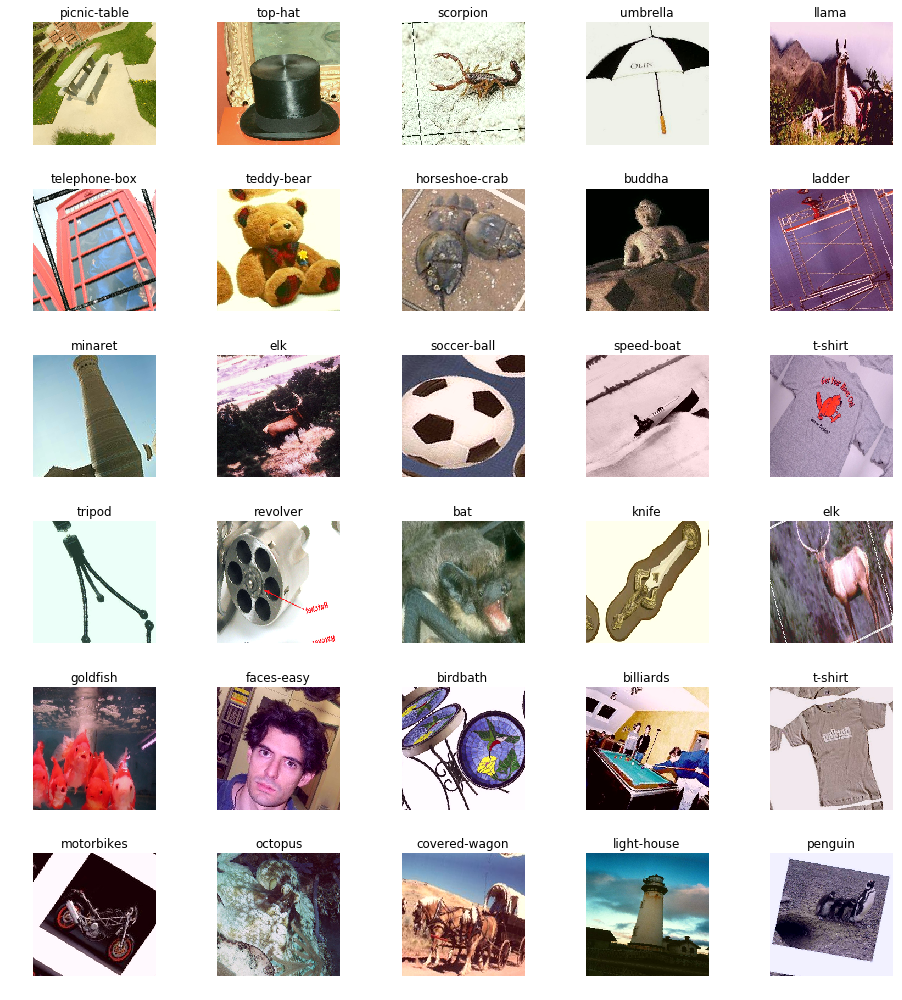

In [5]:
_, axes = plt.subplots(nrows=6, ncols=5, figsize=(13, 14))
axes = axes.flatten()
for i, pic in enumerate(pictures):
    axes[i].set_axis_off();
    axes[i].imshow(pic);
    axes[i].set_title(classes[i]);
plt.tight_layout()